# Task 1

## Question 1

Does the code produce and display clearly a correct decision tree for the weather data?

In [1]:
import numpy as np
import pandas as pd
import pprint

pt = pprint.PrettyPrinter(indent=2)

In [2]:
### Preparing the Data

dataset = pd.read_csv(r'C:\Users\***\Downloads\AI Masters\Bath\FAI\Week7_Ass3\weather-data.csv').dropna()
dataset = dataset.iloc[:, 1:]
dataset

,Outlook,Temperature,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainfall,Mild,High,Weak,Yes
4,Rainfall,Cool,Normal,Weak,Yes
5,Rainfall,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainfall,Mild,Normal,Weak,Yes


In [3]:
category_features = list(dataset.columns)
for c in category_features:
    dataset[c] = dataset[c].astype('category')
y_target = category_features[-1]
feats = category_features[:-1]
print("Target Class: ", y_target)

Target Class:  Decision


In [4]:
def entropy_calculation(feature):
    entropy = 0
    ele, count = np.unique(feature, return_counts=True)
    for i in range(len(ele)):
        proba = count[i] / np.sum(count)
        entropy -= proba * np.log2(proba)
    return entropy

def info_gain(data, split_feat, root_feat):
    E_S = entropy_calculation(data[root_feat])
    avg_information = 0
    attributes, count = np.unique(data[split_feat], return_counts=True)
    for i in range(len(attributes)):
        split_data = data.where(data[split_feat] == attributes[i]).dropna()[root_feat]
        avg_information += (count[i] / np.sum(count)) * entropy_calculation(split_data)
    info_gain = E_S - avg_information
    return info_gain

def split_dataset(data, feature, parameter):
    holder_i = data.where(data[feature] == parameter).dropna()
    return holder_i

print("Entropy is equal to: ", entropy_calculation(dataset[y_target]))
for i in range(len(feats)):
    print("Class: ", feats[i], "\t IF: ", info_gain(dataset, feats[i], y_target))

Entropy is equal to:  0.9402859586706311
Class:  Outlook 	 IF:  0.24674981977443933
Class:  Temperature 	 IF:  0.02922256565895487
Class:  Humidity 	 IF:  0.15183550136234159
Class:  Wind 	 IF:  0.04812703040826949


In [5]:
### ID3 Algorithm

def ID3(data, feats, target_title=y_target):
    if len(np.unique(data[target_title])) <= 1:
        return np.unique(data[target_title])[0]
    else:
        # Identifying features that need to be used for splitting
        feature_information_gain = [info_gain(data, feature, target_title) for feature in feats]
        best_feature = feats[np.argmax(feature_information_gain)]
        tree = {best_feature: {}}

        # Feature list creation
        feats = [i for i in feats if i != best_feature]
        for parameter in np.unique(data[best_feature]):
            # Generate a sub_data separating by best feature categories
            sub_data = split_dataset(data, best_feature, parameter)
            # Generate sub-trees for chosen feature
            branch = ID3(sub_data, feats, target_title)
            # Append branch to the tree
            tree[best_feature][parameter] = branch
        return tree

In [6]:
from collections import defaultdict

d_tree = defaultdict()
d_tree = ID3(dataset, feats)
pt.pprint(d_tree)

{ 'Outlook': { 'Overcast': 'Yes',
               'Rainfall': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}},
               'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}


In [7]:
import pydot
from IPython.display import Image, display

def draw(parent_title, child_title):
    edge = pydot.Edge(parent_title, child_title)
    graph.add_edge(edge)


def inspect(node, parent=None):
    for k, v in node.items():
        if isinstance(v, dict):
            if parent:
                draw(parent, k)
            inspect(v, k)
        else:
            draw(parent, k)
            draw(k, k + "_" + v)

## Question 1 Conclusion

Below we can compare and conclude that the the code produces and displays clearly a correct decision tree for the weather data.

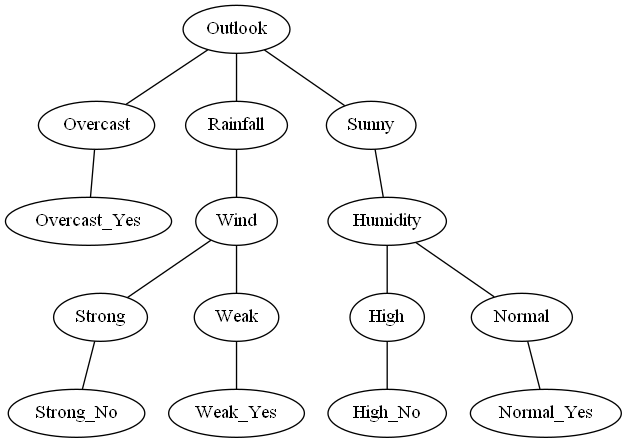

In [8]:
graph = pydot.Dot(graph_type='graph')
inspect(d_tree)
tree_plot = Image(graph.create_png())
display(tree_plot)

# Task 2

## Question 3 Part A

Does the code implement a basic algorithm, or use one or more that go beyond the material presented in the course material? Are the choices well explained and justified?

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X_d = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_d, y, test_size=0.2)

decision_tree_i = tree.DecisionTreeClassifier()
decision_tree_i = decision_tree_i.fit(X_train, y_train)

y_pred = decision_tree_i.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy from sklearn')
print(score)

Accuracy from sklearn
0.6666666666666666


In [10]:
index = X_train.index
dataset_train = []
for i in index:
    dataset_train = dataset_train + dataset.iloc[i:i + 1, :].values.tolist()
dataset_train = pd.DataFrame(dataset_train)
dataset_train.columns = category_features
dataset_train.index = index
dataset_train

,Outlook,Temperature,Humidity,Wind,Decision
6,Overcast,Cool,Normal,Strong,Yes
13,Rainfall,Mild,High,Strong,No
11,Overcast,Mild,High,Strong,Yes
3,Rainfall,Mild,High,Weak,Yes
1,Sunny,Hot,High,Strong,No
9,Rainfall,Mild,Normal,Weak,Yes
12,Overcast,Hot,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes
5,Rainfall,Cool,Normal,Strong,No
7,Sunny,Mild,High,Weak,No


In [11]:
d_tree = ID3(dataset_train, feats)
print('New tree based on training data: ')
pt.pprint(d_tree)

New tree based on training data: 
{ 'Outlook': { 'Overcast': 'Yes',
               'Rainfall': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}},
               'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}


In [12]:
dt = d_tree
index_d = X_test.index

dataset_test = []
for i in index_d:
    dataset_test = dataset_test + dataset.iloc[i:i + 1, :].values.tolist()
dataset_test = pd.DataFrame(dataset_test)
dataset_test.columns = category_features
dataset_test.index = index_d
dataset_test

,Outlook,Temperature,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
2,Overcast,Hot,High,Weak,Yes
4,Rainfall,Cool,Normal,Weak,Yes


In [13]:
def tree_fct(d, t):
    res = []
    for _, e in t.iterrows():
        res.append(predict(d, e))
    return res


def predict(d, e):
    present_node = list(d.keys())[0]
    present_branch = d[present_node][e[present_node]]
    if isinstance(present_branch, str):
        return present_branch
    else:
        return predict(present_branch, e)


dt_y_pred = []
for i in range(0, len(dataset_test)):
    try:
        tree_fct(dt, dataset_test.iloc[i:i + 1, :-1])
    except:
        dt_y_pred = dt_y_pred + ['']
    else:
        dt_y_pred = dt_y_pred + tree_fct(dt, dataset_test.iloc[i:i + 1, :-1])
print('Predicted Decisions:')
print(dt_y_pred)

Predicted Decisions:
['No', 'Yes', 'Yes']


In [14]:
dt_y_pred = pd.DataFrame(dt_y_pred)
dt_y_pred.index = index_d

print('Predicted Decisions df:')
print(dt_y_pred)
print('Actual Decisions')
print(y_test)

Predicted Decisions df:
     0
0   No
2  Yes
4  Yes
Actual Decisions
0     No
2    Yes
4    Yes
Name: Decision, dtype: category
Categories (2, object): ['No', 'Yes']


In [15]:
frames = [y_test, dt_y_pred]
comp_df = pd.concat(frames, axis=1, join='inner')
comp_df['compare'] = np.where(comp_df['Decision'] == comp_df[0], 'True', 'False')
print('Comparison column: ')
print(comp_df)

Comparison column: 
  Decision    0 compare
0       No   No    True
2      Yes  Yes    True
4      Yes  Yes    True


In [16]:
count_Obj = comp_df.apply(lambda x: True if x['compare'] == 'True' else False, axis=1)
num_Rows = len(count_Obj[count_Obj == True].index)

correct_pred = num_Rows
total_pred = len(comp_df)
accuracy = correct_pred / total_pred

print('Count of Correct Predictions = ' + str(correct_pred))
print('Count of Total items = ' + str(total_pred))
print('Accuracy = ' + str(accuracy))

Count of Correct Predictions = 3
Count of Total items = 3
Accuracy = 1.0


# New Dataset

## Question 2

Does the code produce and display clearly a correct decision tree for your chosen dataset?

In [17]:
import numpy as np
import pandas as pd
import pprint

pt = pprint.PrettyPrinter(indent=2)

## Task 2 Question 4

How wide a range of datasets is the implementation able to handle? What types of
features are admissible for inputs and outputs?

As can be seen by the dataset below, the range is suffitiently wide handling not only the small weather dataset that was provided but it also handles a wide range of dataset including the car_evaluation dataset from: https://archive.ics.uci.edu/ml/datasets/car+evaluation
It also handles int, float, strings and other types of data as can be seen below and features can be admissable based on best_feature shown below and as such if any features needs to be dismissed, it can be removed and only desired features can be admissable 

In [18]:
dataset = pd.read_csv(r'C:\Users\***\Downloads\AI Masters\Bath\FAI\Week7_Ass3\Yes-id3\car_evaluation.csv')
dataset

,buying_price,maintenance_cost,number of doors,number of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [19]:
category_features = list(dataset.columns)
for c in category_features:
    dataset[c] = dataset[c].astype('category')
y_target = category_features[-1]
feats = category_features[:-1]
print("Target Class: ", y_target)
print("Target Features: ", feats)

Target Class:  decision
Target Features:  ['buying_price', 'maintenance_cost', 'number of doors', 'number of persons', 'lug_boot', 'safety']


In [20]:
print("Entropy: ", entropy_calculation(dataset[y_target]))
for i in range(len(feats)):
    print("Class: ", feats[i], "\t IF: ", info_gain(dataset, feats[i], y_target))

Entropy:  1.205740970012175
Class:  buying_price 	 IF:  0.09644896916961376
Class:  maintenance_cost 	 IF:  0.07370394692148574
Class:  number of doors 	 IF:  0.004485716626631886
Class:  number of persons 	 IF:  0.21966296333990798
Class:  lug_boot 	 IF:  0.030008141247605202
Class:  safety 	 IF:  0.26218435655426375


In [21]:
### Same ID3 Algorithm

def ID3(data, feats, target_title=y_target):
    if len(np.unique(data[target_title])) <= 1:
        return np.unique(data[target_title])[0]
    else:
        # Identify which feature to use for splitting
        feature_information_gain = [info_gain(data, feature, target_title) for feature in feats]
        best_feature = feats[np.argmax(feature_information_gain)]
        tree = {best_feature: {}}

        # create a new feature list
        feats = [i for i in feats if i != best_feature]
        for parameter in np.unique(data[best_feature]):
            # Build a sub_data splitting them based on the categories of the best feature
            sub_data = split_dataset(data, best_feature, parameter)
            # Create sub-trees for that feature
            branch = ID3(sub_data, feats, target_title)
            # Add the branch to the tree
            tree[best_feature][parameter] = branch
        return tree

In [22]:
from collections import defaultdict

d_tree = defaultdict()

d_tree = ID3(dataset, feats)
pt.pprint(d_tree)

### Decision Tree in dict format

{ 'safety': { 'high': { 'number of persons': { '2': 'unacc',
                                               '4': { 'buying_price': { 'high': { 'maintenance_cost': { 'high': 'acc',
                                                                                                        'low': 'acc',
                                                                                                        'med': 'acc',
                                                                                                        'vhigh': 'unacc'}},
                                                                        'low': { 'maintenance_cost': { 'high': { 'lug_boot': { 'big': 'vgood',
                                                                                                                               'med': { 'number of doors': { '2': 'acc',
                                                                                                                                                    

In [23]:
## Code used to ensure pydot works below
# import sys
# !{sys.executable} -m pip install pydot

## Question 2 Conclusion

#### Since no pruning or max_depth was used then below is what the graph will look like. This is done intentionnaly, to show the down side of overfitting and not pruning correctly to mitigate the issue a new code is written below and a tree is shown differently and a CART algorithm is implemented so that it can be pruned and an adequaltely looking graph is created

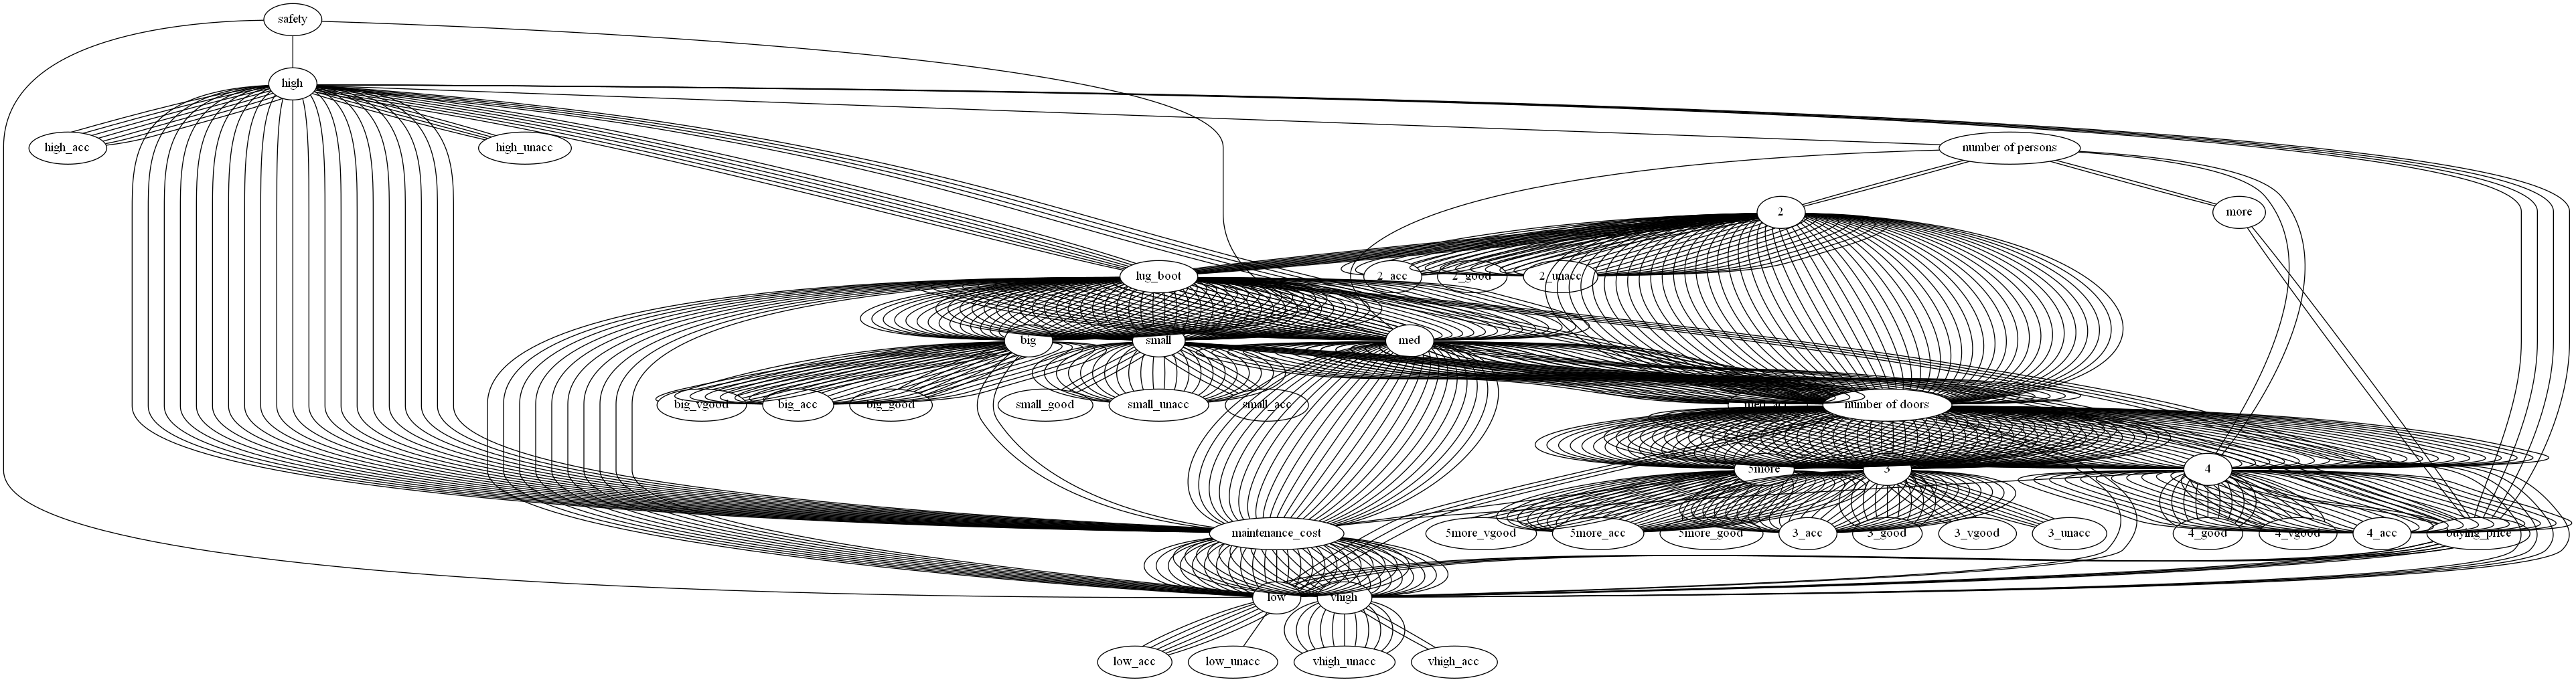

In [24]:
graph = pydot.Dot(graph_type='graph')
inspect(d_tree)
tree_plot = Image(graph.create_png())
display(tree_plot)

In [25]:
import math
import copy
from collections import Counter

coluNames = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
carEval = carEval = pd.read_csv('car.data', names = coluNames, header = None)
train, test = train_test_split(carEval, test_size=0.2)


def enntropy(inputArray, base=4):
    enntropy = 0
    count_sm = list(Counter(inputArray).values())
    proba = [x / sum(count_sm) for x in count_sm]
    for probl in proba:
        if probl != 0:
            enntropy += (-probl * math.log(probl, base))
    return enntropy

def gain(data, atribute, initEntropy, classCol='class', clases=['unacc', 'acc', 'good', 'vgood']):
    classConts = {}
    instances = data.shape[0]
    gain = initEntropy
    base = len(clases)

    for indx, rw in data.iterrows():
        idx = clases.index(rw[classCol])
        atributeValue = rw[atribute]
        if atributeValue not in classConts:
            classConts[atributeValue] = [1 if i == idx else 0 for i in range(base)]
        else:
            classConts[atributeValue][idx] += 1

    for key, value in classConts.items():
        instncesLeft = sum(value)
        proba = [x / instncesLeft for x in value]
        enntropy = 0
        for probl in proba:
            if probl != 0:
                enntropy -= probl * math.log(probl, base)
        gain -= (instncesLeft / instances) * enntropy
    return gain

class Node:
    def __init__(self, name='root', data=None, iLeaf=False):
        self.name = name
        self.data = data
        self.children = {}
        self.iLeaf = iLeaf

    def __str__(self):
        return str(self.name)

    def getSbling(self, paths):
        if paths[0] not in self.children:
            print('getChild: tnode ' + str(self.data) + ' has no child with path: ' + paths[0])
        elif paths[1:]:
            return self.children[paths[0]].getSbling(paths[1:])
        else:
            return self.children[paths[0]]

    def addSiblng(self, paths, tnode):
        if paths[0] not in self.children:
            if paths[1:]:
                print('addSiblng: tnode ' + self.data + ' has no child with path: ' + paths[0])
            else:
                self.children[paths[0]] = tnode
        else:
            self.children[paths[0]].addSiblng(paths[1:], tnode)

def prntTree(tnode, level=0, path=''):
    if level == 0:
        print('DTree: ' + str(tnode))
    else:
        print('\t' * level + '└' + '─' + path + '─>' + str(tnode))
    if tnode.children:
        for key in tnode.children:
            prntTree(tnode.children[key], level + 1, key)

root = Node()

def bldTree(tnode, leftAtributes, classCol='class', clases=['unacc', 'acc', 'good', 'vgood']):
    if tnode.name == 'root':
        presentEntropy = enntropy(list(tnode.data[classCol]))
        maxiGain = 0
        maxiGainAttribute = ''
        for atribute in leftAtributes:
            gains = 0
            gains = gain(tnode.data, atribute, presentEntropy)
            if gains >= maxiGain:
                maxiGain = gains
                maxiGainAttribute = atribute

        leftAtributes.remove(maxiGainAttribute)
        child = Node(maxiGainAttribute, tnode.data)
        tnode.addSiblng([''], child)
        bldTree(tnode.getSbling(['']), list(leftAtributes))

    else:
        atribute = tnode.name
        attributeValues = set(tnode.data[atribute])
        oldDf = tnode.data

        for atributeValue in attributeValues:
            newDtf = oldDf.loc[oldDf[atribute] == atributeValue]
            presentEntropy = enntropy(list(newDtf[classCol]))

            if presentEntropy != 0 and leftAtributes:
                maxiGain = 0
                maxiGainAttribute = ''
                for leftAttribute in leftAtributes:
                    gains = gain(newDtf, leftAttribute, presentEntropy)
                    if gains >= maxiGain:
                        maxiGain = gains
                        maxiGainAttribute = leftAttribute

                left = list(leftAtributes)
                left.remove(maxiGainAttribute)
                child = Node(maxiGainAttribute, newDtf)
                tnode.addSiblng([atributeValue], child)
                bldTree(tnode.getSbling([atributeValue]), list(left))
            else:
                clasification = Counter(newDtf[classCol]).most_common(1)[0][0]
                child = Node(clasification, iLeaf=True)
                tnode.addSiblng([atributeValue], child)


allAtributes = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

roott = Node('root', train)
bldTree(roott, allAtributes)

prntTree(roott)

DTree: root
	└──>safety
		└─low─>unacc
		└─med─>persons
			└─4─>buying
				└─vhigh─>maint
					└─vhigh─>unacc
					└─low─>lug_boot
						└─small─>unacc
						└─med─>doors
							└─2─>unacc
							└─5more─>acc
							└─3─>unacc
							└─4─>acc
						└─big─>acc
					└─med─>lug_boot
						└─small─>unacc
						└─med─>doors
							└─5more─>acc
							└─3─>unacc
							└─4─>acc
						└─big─>acc
					└─high─>unacc
				└─low─>maint
					└─vhigh─>lug_boot
						└─small─>unacc
						└─med─>doors
							└─2─>unacc
							└─5more─>acc
							└─3─>unacc
							└─4─>acc
						└─big─>acc
					└─low─>lug_boot
						└─small─>acc
						└─med─>doors
							└─4─>good
							└─5more─>good
							└─3─>acc
							└─2─>acc
						└─big─>good
					└─med─>lug_boot
						└─small─>acc
						└─med─>doors
							└─5more─>good
							└─3─>acc
							└─2─>acc
						└─big─>good
					└─high─>acc
				└─med─>maint
					└─vhigh─>lug_boot
						└─small─>unacc
						└─med─>doors
							└─5more─>acc
							└─3─>unacc
							└

# Task 2 Question 3 Part B

Does the code implement a basic algorithm, or use one or more that go beyond the material presented in the course material? Are the choices well explained and justified?

In [26]:
X = dataset.iloc[:, :-1]

y = dataset.iloc[:, -1]

X_d = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_d, y, test_size=0.2)

decision_tree_i = tree.DecisionTreeClassifier()
decision_tree_i = decision_tree_i.fit(X_train, y_train)

y_pred = decision_tree_i.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy from sklearn: ")
print(score)

Accuracy from sklearn: 
0.9161849710982659


In [27]:
index = X_train.index
dataset_train = []
for i in index:
    dataset_train = dataset_train + dataset.iloc[i:i + 1, :].values.tolist()
dataset_train = pd.DataFrame(dataset_train)
dataset_train.columns = category_features
dataset_train.index = index
dataset_train

,buying_price,maintenance_cost,number of doors,number of persons,lug_boot,safety,decision
358,vhigh,low,3,2,big,med,unacc
578,high,high,3,4,small,high,acc
662,high,med,2,4,med,high,acc
1366,low,vhigh,4,4,big,med,acc
332,vhigh,low,2,2,big,high,unacc
...,...,...,...,...,...,...,...
211,vhigh,high,5more,more,med,med,unacc
242,vhigh,med,2,more,big,high,acc
1673,low,low,3,more,big,high,vgood
82,vhigh,vhigh,5more,2,small,med,unacc


In [28]:
d_tree = ID3(dataset_train, feats)
print('New tree based on training data: ')
pt.pprint(d_tree)

New tree based on training data: 
{ 'safety': { 'high': { 'number of persons': { '2': 'unacc',
                                               '4': { 'buying_price': { 'high': { 'maintenance_cost': { 'high': 'acc',
                                                                                                        'low': 'acc',
                                                                                                        'med': 'acc',
                                                                                                        'vhigh': 'unacc'}},
                                                                        'low': { 'maintenance_cost': { 'high': { 'lug_boot': { 'big': 'vgood',
                                                                                                                               'med': { 'number of doors': { '3': 'acc',
                                                                                                                  

In [29]:
dt = d_tree
# df = X_test
index_d = X_test.index

dataset_test = []
for i in index_d:
    dataset_test = dataset_test + dataset.iloc[i:i + 1, :].values.tolist()
dataset_test = pd.DataFrame(dataset_test)
dataset_test.columns = category_features
dataset_test.index = index_d
dataset_test

,buying_price,maintenance_cost,number of doors,number of persons,lug_boot,safety,decision
1696,low,low,4,more,med,med,good
1112,med,med,3,2,med,high,unacc
963,med,vhigh,5more,more,small,low,unacc
428,vhigh,low,5more,more,med,high,acc
5,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
103,vhigh,vhigh,5more,more,med,med,unacc
1456,low,high,3,more,big,med,acc
950,med,vhigh,5more,2,med,high,unacc
1505,low,high,5more,more,small,high,acc


In [30]:
dt_y_pred = []
for i in range(0, len(dataset_test)):
    try:
        tree_fct(dt, dataset_test.iloc[i:i + 1, :-1])
    except:
        dt_y_pred = dt_y_pred + ['']
    else:
        dt_y_pred = dt_y_pred + tree_fct(dt, dataset_test.iloc[i:i + 1, :-1])

dt_y_pred = pd.DataFrame(dt_y_pred)
dt_y_pred.index = index_d

print('Predicted Desicions: ')
print(dt_y_pred)
print('Actual Desicions: ')
print(y_test)

Predicted Desicions: 
          0
1696   good
1112  unacc
963   unacc
428        
5     unacc
...     ...
103   unacc
1456    acc
950   unacc
1505       
1088  unacc

[346 rows x 1 columns]
Actual Desicions: 
1696     good
1112    unacc
963     unacc
428       acc
5       unacc
        ...  
103     unacc
1456      acc
950     unacc
1505      acc
1088    unacc
Name: decision, Length: 346, dtype: category
Categories (4, object): ['acc', 'good', 'unacc', 'vgood']


In [31]:
frames = [y_test, dt_y_pred]
comp_df = pd.concat(frames, axis=1, join='inner')
comp_df['compare'] = np.where(comp_df['decision'] == comp_df[0], 'True', 'False')
print('Comaprison column: ')
print(comp_df)

Comaprison column: 
     decision      0 compare
1696     good   good    True
1112    unacc  unacc    True
963     unacc  unacc    True
428       acc          False
5       unacc  unacc    True
...       ...    ...     ...
103     unacc  unacc    True
1456      acc    acc    True
950     unacc  unacc    True
1505      acc          False
1088    unacc  unacc    True

[346 rows x 3 columns]


In [32]:
count_Obj = comp_df.apply(lambda x: True if x['compare'] == 'True' else False, axis=1)
num_Rows = len(count_Obj[count_Obj == True].index)
print('Number of rows with accurate predictions')
print(num_Rows)

Number of rows with accurate predictions
301


In [33]:
correct_pred = num_Rows
total_pred = len(comp_df)
accuracy = correct_pred / total_pred

print('Count of Correct Predictions = ' + str(correct_pred))
print('Count of Total items = ' + str(total_pred))
print('Accuracy = ' + str(accuracy))

Count of Correct Predictions = 301
Count of Total items = 346
Accuracy = 0.869942196531792


Conclusion: The code can produce and display clearly a correct decision tree for new chosen dataset and the comparison of prediction accuracy vs sklearn concretizes this statement 

# Extension CART

Extension of Task 2 questions 3: Does the code implement a basic algorithm, or use one or more that go beyond the material
presented in the course material?

In [39]:
import numpy as np
import pandas as pd

class CUSTOM_CART(object):
    def __init__(self, tree='cls', criterion='gini', prune='depth', max_dpth=4, min_criterion=0.05):
        self.feat = None
        self.name = None
        self.i_samples = None
        self.gain = None
        self.lft = None
        self.rht = None
        self.max_th = None
        self.depth = 0

        self.root = None
        self.criterion = criterion
        self.prune = prune
        self.max_dpth = max_dpth
        self.min_criterion = min_criterion
        self.tree = tree

    def fit(self, feats, output):
        self.root = CUSTOM_CART()
        if (self.tree == 'cls'):
            self.root._grow_tree(feats, output, self.criterion)
        else:
            pass
        self.root._prune(self.prune, self.max_dpth, self.min_criterion, self.root.i_samples)

    def predict(self, feats):
        return np.array([self.root._predict(f) for f in feats])

    def print_tree(self):
        self.root._show_tree(0, ' ')

    def _grow_tree(self, feats, output, criterion='gini'):
        self.i_samples = feats.shape[0]

        if len(np.unique(output)) == 1:
            self.name = output[0]
            return

        best_gain = 0.0
        best_feature = None
        best_threshold = None

        if criterion in {'gini', 'entropy'}:
            self.name = max([(c, len(output[output == c])) for c in np.unique(output)], key=lambda x: x[1])[0]
        else:
            self.name = np.mean(output)

        impurity_nde = self._calc_impurity(criterion, output)

        for col in range(feats.shape[1]):
            feat_level = np.unique(feats[:, col])
            thresholds = (feat_level[:-1] + feat_level[1:]) / 2.0

            for max_th in thresholds:
                target_lft = output[feats[:, col] <= max_th]
                impurity_lft = self._calc_impurity(criterion, target_lft)
                n_l = float(target_lft.shape[0]) / self.i_samples

                target_rht = output[feats[:, col] > max_th]
                impurity_r = self._calc_impurity(criterion, target_rht)
                n_r = float(target_rht.shape[0]) / self.i_samples

                impurity_gain = impurity_nde - (n_l * impurity_lft + n_r * impurity_r)
                if impurity_gain > best_gain:
                    best_gain = impurity_gain
                    best_feature = col
                    best_threshold = max_th

        self.feat = best_feature
        self.gain = best_gain
        self.max_th = best_threshold
        self._split_tree(feats, output, criterion)

    def _split_tree(self, feats, output, criterion):
        features_l = feats[feats[:, self.feat] <= self.max_th]
        target_lft = output[feats[:, self.feat] <= self.max_th]
        self.lft = CUSTOM_CART()
        self.lft.depth = self.depth + 1
        self.lft._grow_tree(features_l, target_lft, criterion)

        features_r = feats[feats[:, self.feat] > self.max_th]
        target_rht = output[feats[:, self.feat] > self.max_th]
        self.rht = CUSTOM_CART()
        self.rht.depth = self.depth + 1
        self.rht._grow_tree(features_r, target_rht, criterion)

    def _calc_impurity(self, criterion, output):
        if criterion == 'gini':
            return 1.0 - sum(
                [(float(len(output[output == c])) / float(output.shape[0])) ** 2.0 for c in np.unique(output)])
        else:
            entropy = 0.0
            for c in np.unique(output):
                p = float(len(output[output == c])) / output.shape[0]
                if p > 0.0:
                    entropy -= p * np.log2(p)
            return entropy

    def _prune(self, method, max_dpth, min_criterion, i_samples):
        if self.feat is None:
            return

        self.lft._prune(method, max_dpth, min_criterion, i_samples)
        self.rht._prune(method, max_dpth, min_criterion, i_samples)

        pruning = False

        if method == 'impurity' and self.lft.feat is None and self.rht.feat is None:
            if (self.gain * float(self.i_samples) / i_samples) < min_criterion:
                pruning = True
        elif method == 'depth' and self.depth >= max_dpth:
            pruning = True

        if pruning is True:
            self.lft = None
            self.rht = None
            self.feat = None

    def _predict(self, d):
        if self.feat != None:
            if d[self.feat] <= self.max_th:
                return self.lft._predict(d)
            else:
                return self.rht._predict(d)
        else:
            return self.name

    def _show_tree(self, depth, cond):
        base = '    ' * depth + cond
        if self.feat != None:
            print(base + 'if X[' + str(cat_for_tree[self.feat]) + '] <= ' + str(self.max_th))
            self.lft._show_tree(depth + 1, 'then ')
            self.rht._show_tree(depth + 1, 'else ')
        else:
            print(base + '{value: ' + str(self.name) + ', samples: ' + str(self.i_samples) + '}')


from sklearn import tree as sktree


def classification_example():
    print('\n\nClassification Tree')
    dataset = pd.read_csv(r'C:\Users\***\Downloads\AI Masters\Bath\FAI\Week7_Ass3\Yes-id3\car_evaluation-Copy.csv').dropna()
    X_new = dataset.iloc[:,0:-1]
    y_new = dataset.iloc[:,-1]
    X_new = pd.get_dummies(X_new, drop_first=True)
    y_new = y_new.map({'unacc':0, 'acc':1, 'good':2, 'vgood': 3})
    global cat_for_tree
    cat_for_tree = list(X_new.columns)
    X_new = X_new.to_numpy()
    y_new = y_new.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state=42)

    cls = CUSTOM_CART(tree='cls', criterion='entropy', prune='depth', max_dpth=3)
    cls.fit(X_train, y_train)
    cls.print_tree()

    pred = cls.predict(X_test)
    print("Custom Classification Tree Prediction Accuracy:    {}".format(sum(pred == y_test) / len(pred)))

    clf = sktree.DecisionTreeClassifier(criterion='entropy')
    clf = clf.fit(X_train, y_train)
    sk_pred = clf.predict(X_test)

    print("Sklearn Library Tree Prediction Accuracy:        {}".format(sum(sk_pred == y_test) / len(pred)))


classification_example()



Classification Tree
 if X[safety_low] <= 0.5
    then if X[number of persons_4] <= 0.5
        then if X[number of persons_more] <= 0.5
            then {value: 0, samples: 280}
            else {value: 1, samples: 282}
        else if X[buying_price_low] <= 0.5
            then {value: 1, samples: 223}
            else {value: 1, samples: 71}
    else {value: 0, samples: 440}
Custom Classification Tree Prediction Accuracy:    0.7939814814814815
Sklearn Library Tree Prediction Accuracy:        0.8981481481481481
